# Tasks for laboratory assignment 1

In [4]:
# imports section

import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
from datetime import datetime
import csv
import numpy as np
import matplotlib.pyplot as plt

## Extract webpage data given the url

Create a Python script that performs basic web scraping on a page to extract all the information into text and returns it as a string.
String should not contain tags.

In [26]:
def parse_web_page(url):
    try:
        response = requests.get(url)
        response.raise_for_status()

        soup = BeautifulSoup(response.text)

        return soup.get_text(separator=' ', strip=True)
    except requests.exceptions.HTTPError as e:
        print(f'HTTP error occured: {e}')
    except Exception as e:
        print(f'Error occured: {e}')

print(parse_web_page('https://fmi.chnu.edu.ua/')[:255])
print(parse_web_page('https://en.wikipedia.org/wiki/Web_scraping')[:255])

Головна - Факультет математики та інформатики Перейти до основного вмісту [email protected] 58012, Україна, м. Чернівці, вул. Університетська, 28 Новини Всі Загальні Оголошення Події Студенту Викладачу Вітання Діяльність Наукова Навчально-методична Міжнар
Web scraping - Wikipedia Jump to content Main menu Main menu move to sidebar hide Navigation Main page Contents Current events Random article About Wikipedia Contact us Donate Contribute Help Learn to edit Community portal Recent changes Upload file Searc


## Get data from the API

Create a python script that performs basic request to API endpoint and saves that data to a JSON file `result.json`.

In [25]:
def parse_api(api_url):
    try:
        response = requests.get(api_url)
        response.raise_for_status()
    except requests.exceptions.HTTPError as e:
        print(f'HTTP error occured: {e}')
    except Exception as e:
        print(f'Error occured: {e}')

    with open('resources/result.json', 'w') as file:
        json.dump(response.json(), file, indent=4)
parse_api('https://api.github.com/')

## Parse the json file

Parse the `weather.json` file and return weather data for a specific date, that is given as a parameter. Return the data as an array.

In [24]:
def parse_json(date):
    target_date = datetime.strptime(date, '%Y-%m-%d')

    with open('resources/weather.json', 'r') as file:
        weather_data = json.load(file)

    daily = weather_data.get('daily', [])
    for day in daily:
        entry_date = datetime.strptime(day.get('date'), '%Y-%m-%d')
        
        if entry_date == target_date:
            return day.values()
    
    return []

target_date = '2024-08-19'
print(parse_json(target_date))

dict_values(['2024-08-19', 30.0, 21.0, 5.0, 10.0, 70, 'Light rain'])


## Parse the csv file

Parse the `weather.csv` file and return weather data for a specific date, that is given as a parameter. Return the data as an array.

In [53]:
def parse_csv(date):
    df = pd.read_csv('resources/weather.csv')

    rows = df[df['CET'] == target_date].values.tolist()
    return rows[0] if len(rows) > 0 else []
    
target_date = '1997-5-22'
print(parse_csv(target_date))

['1997-5-22', 25.0, 18.0, 10.0, 11.0, 8.0, 6.0, 88.0, 54.0, 34.0, 1017, 1015, 1012, 10.0, 10.0, 10.0, 11, 3, nan, 0.0, 3.0, nan, 277]


## Visualize data

Visualize the `weather.csv` data using matplotlib. Choose your own approach to data visualization. Save the results (as `.png`, `.webp` files etc., your choise) in this repository. 

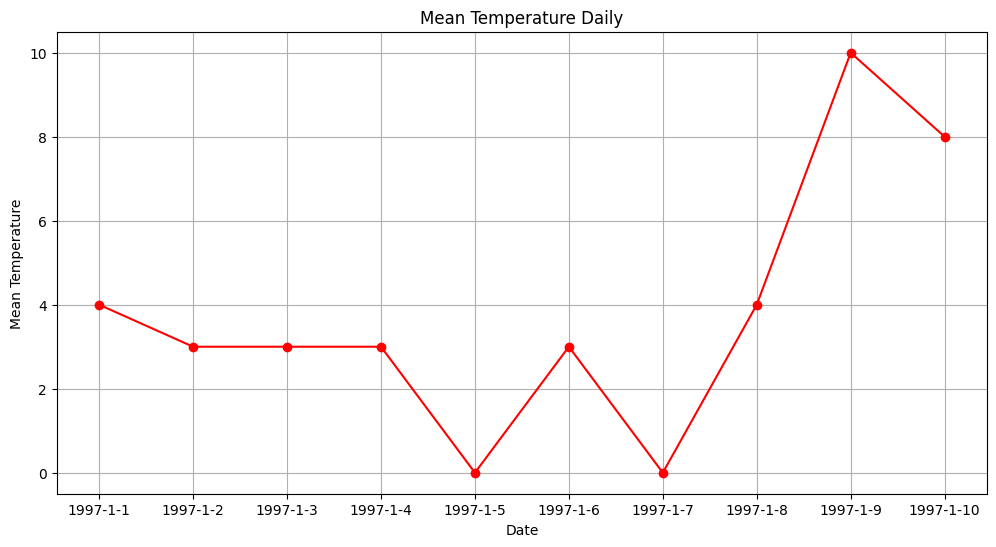

In [22]:
def visualize_data():
    df = pd.read_csv('resources/weather.csv', nrows=10)
    
    plt.figure(figsize=(12, 6))
    plt.plot(df['CET'], df['Mean TemperatureC'], marker='o', linestyle='-', color='red')
    plt.xlabel('Date')
    plt.ylabel('Mean Temperature')
    plt.title('Mean Temperature Daily')
    plt.grid(True)
    plt.show()

visualize_data()